# Geodéziai paraméterek meghatározása a potenciál gömbfüggvénysorából

### Csomagok importálása

In [160]:
from math import *
import numpy as np

import utils

### Numpy tömbök kiírásának beállítása

In [161]:
np.set_printoptions(linewidth=150)

### Kiinduló adatok

A 2. számú pont GRS80 ellipszoidra vonatkozó ellipszoidi földrajzi koordinátái:  

$$ \varphi =  45 - 52 - 59,3690 $$ 
$$ \lambda =  17 - 46 - 38,7912 $$
$$ \psi = 45-41-26.9187 $$
$$ \vartheta = 90° - \psi = 44 - 18 - 33.0813 $$

In [162]:
fi_dms = (45, 52, 59.3690)
lambda_dms = (17, 46, 38.7912)
psi_dms = (45, 41, 26.9187)
theta_dms = (44, 18, 33.0813)

Szögek átváltása fokba:

In [163]:
fi = utils.dms_to_deg(fi_dms)
lambda_ = utils.dms_to_deg(lambda_dms)
psi = utils.dms_to_deg(psi_dms)
theta = utils.dms_to_deg(theta_dms)

print('fi = {}°'.format(fi))
print('lambda = {}°'.format(lambda_))
print('psi = {}°'.format(psi))
print('theta = {}°'.format(theta))

fi = 45.883158055555555°
lambda = 17.777442°
psi = 45.69081075°
theta = 44.309189249999996°


Szögek átváltása radiánba:

In [164]:
fi_rad = np.deg2rad(fi)
lambda_rad = np.deg2rad(lambda_)
psi_rad = np.deg2rad(psi)
theta_rad = np.deg2rad(theta)

print('fi = {} rad'.format(fi_rad))
print('lambda = {} rad'.format(lambda_rad))
print('psi = {} rad'.format(psi_rad))
print('theta = {} rad'.format(theta_rad))

fi = 0.8008121792824038 rad
lambda = 0.3102748954823258 rad
psi = 0.7974550854931197 rad
theta = 0.7733412413017768 rad


A GRS80 ellipszoid paraméterei:
$$ a = 6 378 136,3m $$
$$ r = 6 367 305.589 m $$
$$  kM=3 986 00.4415 * 10^9 m^2s^{-2} $$
$$ \omega = 7,292115 * 10^{-5} rad*s^{-1} $$

In [165]:
a = 6378136.3
r = 6367305.589
kM = 398600.4415E+09
omega = 7.292115E-05

A GGM05C modell együtthatói:

In [166]:
C = np.zeros((9, 9))
S = np.zeros((9, 9))

raw = np.loadtxt('data/GGM05C.dat')

for row in raw:
    row_index = int(row[0])
    col_index = int(row[1])
    
    C[row_index, col_index] = row[2]
    S[row_index, col_index] = row[3]

In [167]:
print('C = \n', C.round(9))

C = 
 [[ 1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [-4.84155e-04 -0.00000e+00  2.43900e-06  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 9.57000e-07  2.03000e-06  9.05000e-07  7.21000e-07  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 5.40000e-07 -5.36000e-07  3.50000e-07  9.91000e-07 -1.88000e-07  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 6.90000e-08 -6.30000e-08  6.52000e-07 -4.52000e-07 -2.95000e-07  1.75000e-07  0.00000e+00  0.00000e+00  0.00000e+00]
 [-1.50000e-07 -7.60000e-08  4.90000e-08  5.70000e-08 -8.60000e-08 -2.67000e-07  9.00000e-09  0.00000e+00  0.00000e+00]
 [ 9.10000e-08  2.81000e-07  3.30000e-07  2.50000e-07 -2.75000e-07  2.00000e-09 -3.59000e-07  2.00000e-09  0.00000e+00]
 [ 4.90000e-08  2.30000e-08  8.000

In [168]:
print('S = \n', S.round(10))

S = 
 [[ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  1.4000e-09 -1.4003e-06  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  2.4820e-07 -6.1900e-07  1.4144e-06  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.7360e-07  6.6250e-07 -2.0100e-07  3.0880e-07  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -9.4300e-08 -3.2330e-07 -2.1490e-07  4.9800e-08 -6.6940e-07  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  2.6500e-08 -3.7380e-07  9.0000e-09 -4.7140e-07 -5.3650e-07 -2.3740e-07  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  9.5200e-08  9.3000e-08 -2.1710e-07 -1.2410e-07  1.7900e-08  1.5180e-07  2.4100e-08  0.0000e+00]
 [ 0.0000e+00  5.8900e-08  6.5300e-08 -8.5900e-08  6.9800e-08  8.9200e-08  3.0890e-07  7.4900e-08  1.2050e

### Normalizált Legendre-függvények számítása

Kezdőértékek:

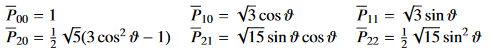

In [169]:
P = np.zeros((9,9))

P[0,0] = 1
P[1,0] = sqrt(3) * cos(theta_rad)
P[1,1] = sqrt(3) * sin(theta_rad)
P[2,0] = 0.5 * sqrt(5) * (3 * pow(cos(theta_rad), 2) - 1)
P[2,1] = sqrt(15) * sin(theta_rad) * cos(theta_rad)
P[2,2] = 0.5 * sqrt(15) * pow(sin(theta_rad), 2)

print(P)

[[1.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [1.23942215 1.20988956 0.         0.         0.         0.         0.         0.         0.        ]
 [0.59945322 1.93592869 0.94489997 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.        ]]


Rekurziós összefüggések:
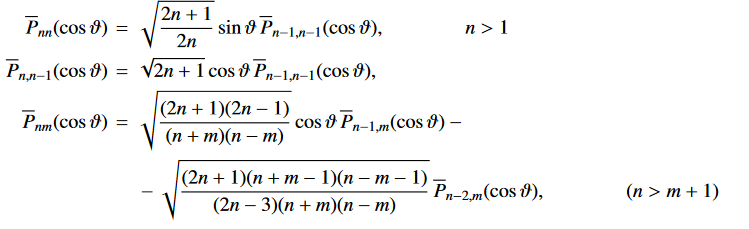

In [170]:
def rekurzio_nn(matrix, theta):
    for n in range(2, len(matrix)):
        matrix[n,n] = sqrt((2 * n + 1)/(2 * n)) * sin(theta) * matrix[n-1,n-1]
        
def rekurzio_nn1(matrix, theta):
    for n in range(2, len(matrix)):
        matrix[n,n-1] = sqrt(2 * n + 1) * cos(theta) * matrix[n-1,n-1]
        
def rekurzio_nm(matrix, theta):
    for n in range(3, len(matrix)):
        for m in range(0, n-1):
            matrix[n,m] = sqrt(((2 * n + 1) * (2 * n - 1))/((n + m) * (n - m))) * cos(theta) * matrix[n-1,m] \
            - sqrt(((2 * n + 1) * (n + m - 1) * (n - m - 1))/((2 * n - 3) * (n + m) * (n - m))) * matrix[n-2,m]

In [171]:
rekurzio_nn(P, theta_rad)
rekurzio_nn1(P, theta_rad)
rekurzio_nm(P, theta_rad)

print(P)

[[ 1.          0.          0.          0.          0.          0.          0.          0.          0.        ]
 [ 1.23942215  1.20988956  0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.59945322  1.93592869  0.94489997  0.          0.          0.          0.          0.          0.        ]
 [-0.4162508   1.76584245  1.78893055  0.7129258   0.          0.          0.          0.          0.        ]
 [-1.19423786  0.69280014  2.11482563  1.53046785  0.52820887  0.          0.          0.          0.        ]
 [-1.28314155 -0.74312299  1.59059685  2.13308227  1.25360484  0.38697877  0.          0.          0.        ]
 [-0.63391584 -1.76435672  0.34707384  2.09682573  1.97282435  0.99842958  0.28135413  0.          0.        ]
 [ 0.37941273 -1.80372115 -1.0493103   1.26641358  2.29204395  1.73058205  0.77975388  0.20343234  0.        ]
 [ 1.17623596 -0.8356139  -1.89167074 -0.09356592  1.90975607  2.27090571  1.46463553  0.60020981  0.14647705]]


Ellenőrzés:

In [172]:
for n in range(0, len(P)):
    print('{}\t{}'.format(round(sum([pow(P[n,m], 2) for m in range(0, n+1)])), 2 * n + 1))

1	1
3	3
5	5
7	7
9	9
11	11
13	13
15	15
17	17


### Nehézségi térerősség

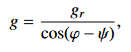
ahol

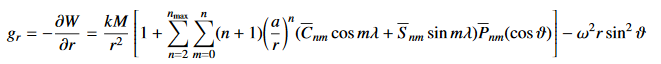

In [173]:
g_r = 1

for n in range(2, len(P)):
    for m in range(0, n+1):
        g_r += (n + 1) * pow(a / r, n) * (C[n,m] * cos(m * lambda_rad) + S[n,m] * sin(m * lambda_rad)) * P[n,m]
        

print(g_r)
print(kM / pow(r, 2))
print(pow(omega, 2) * r * pow(sin(theta_rad), 2))


g_r = (kM / pow(r, 2)) * g_r - pow(omega, 2) * r * pow(sin(theta_rad), 2)

print('g_r = {}'.format(g_r))

g = g_r / cos(fi_rad - psi_rad)

print('g = {}'.format(g))

0.9991370233653956
9.831649513695467
0.016520869972705934
g_r = 9.806644159912823
g = 9.806699420998102


### Nehézségi erőtér potenciálja

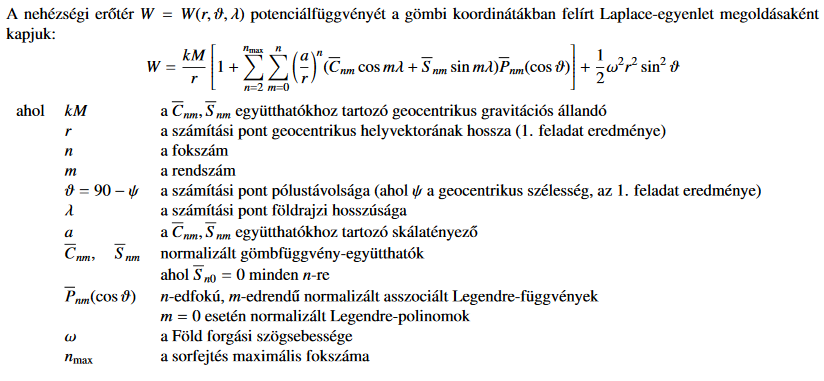

In [174]:
W = 1

for n in range(2, len(P)):
    for m in range(0, n+1):
        W += pow((a / r), n) * (C[n,m] * cos(m * lambda_rad) + S[n,m] * sin(m * lambda_rad)) * P[n,m]


W = kM / r * W + 0.5 * pow(omega, 2) * pow(r, 2) * pow(sin(theta_rad), 2)

print('W = {}'.format(W))

W = 62635765.35512515


### Ellenőrzés az egyetemi weboldalon 

In [175]:
from urllib import request, parse

from IPython.display import HTML

# Post paraméterek enkódolása bájtokká.
data = parse.urlencode({'neptun': 'WJ81S1', 'g': round(g, 9), 'W': round(W, 2)}).encode()
# Request létrehozása.
req = request.Request('http://www.agt.bme.hu/gtoth/fg/process2hf.php', data=data)
# Request megnyitása. 
resp = request.urlopen(req)
# Response kiolvasása, dekódolása, majd megjelenítése.
resp_str = resp.read().decode('utf-8')

# Fölösleges elemek eltávolítása.
str_remove = \
'''
<tr><td colspan="3"><hr></td></tr>
<tr><td colspan="3" style="text-align:center">
<button onclick="goBack()">Visszamegyek</button>
</td></tr>
'''
resp_str = resp_str.replace(str_remove, '')

# Workaround: a GitHub IPythonja nem tudja lerenderelni a font tag-eket.
resp_str = resp_str.replace('<font', '<span').replace('\font', '\span')

HTML(resp_str)